In [ ]:
# Name - Aman Yadav
# Roll no. -202401100400029
# CSEAIML (A)

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
df = pd.read_csv('/content/crop_yield.csv')

# Show the first few rows
df.head()


,soil_quality,rainfall,seed_type,yield_category
0,5.787214,376.596391,C,low
1,2.222101,787.223810,A,low
2,1.893720,810.077116,A,medium
3,2.879777,943.405918,C,medium
4,9.330736,224.439566,C,medium


In [24]:
# Check for missing values and basic info
print(df.info())
print(df.isnull().sum())

# Check unique values in categorical columns
print(df.nunique())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   soil_quality    100 non-null    float64
 1   rainfall        100 non-null    float64
 2   seed_type       100 non-null    object 
 3   yield_category  100 non-null    object 
dtypes: float64(2), object(2)
memory usage: 3.3+ KB
None
soil_quality      0
rainfall          0
seed_type         0
yield_category    0
dtype: int64
soil_quality      100
rainfall          100
seed_type           3
yield_category      3
dtype: int64


In [26]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
for column in df.columns:
    if df[column].dtype == 'object':
        df[column] = le.fit_transform(df[column])

df.head()


,soil_quality,rainfall,seed_type,yield_category
0,5.787214,376.596391,2,1
1,2.222101,787.223810,0,1
2,1.893720,810.077116,0,2
3,2.879777,943.405918,2,2
4,9.330736,224.439566,2,2


In [28]:
from sklearn.model_selection import train_test_split

# Features and target
X = df.drop('yield_category', axis=1)
y = df['yield_category']  # assuming 'yield' is the target column

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [29]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Train the model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Evaluate
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.50      0.50      0.50         8
           1       0.40      0.80      0.53         5
           2       0.50      0.14      0.22         7

    accuracy                           0.45        20
   macro avg       0.47      0.48      0.42        20
weighted avg       0.47      0.45      0.41        20



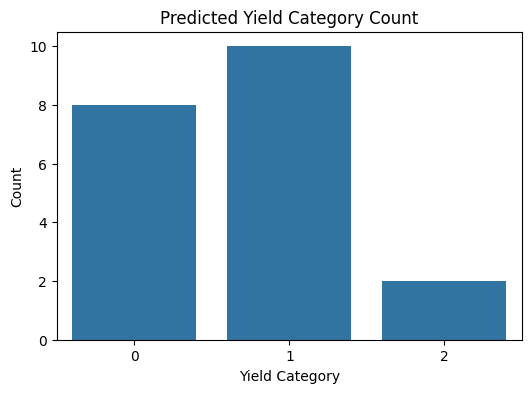

In [30]:
import numpy as np

# Count predictions
unique, counts = np.unique(y_pred, return_counts=True)
pred_counts = dict(zip(unique, counts))

# Bar chart
plt.figure(figsize=(6, 4))
sns.barplot(x=list(pred_counts.keys()), y=list(pred_counts.values()))
plt.title('Predicted Yield Category Count')
plt.xlabel('Yield Category')
plt.ylabel('Count')
plt.show()


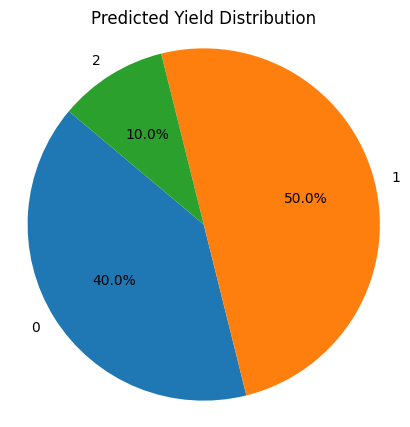

In [32]:
# Pie chart
plt.figure(figsize=(5, 5))
plt.pie(pred_counts.values(), labels=pred_counts.keys(), autopct='%1.1f%%', startangle=140)
plt.title('Predicted Yield Distribution')
plt.axis('equal')
plt.show()
